In [1]:
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
qual_corr = abs(df.corr()['quality']).sort_values(ascending=False)

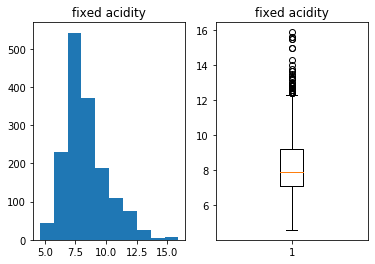

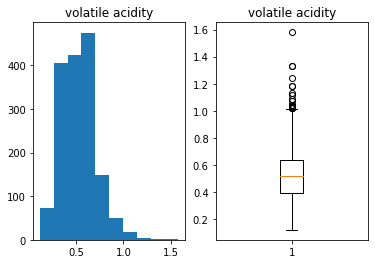

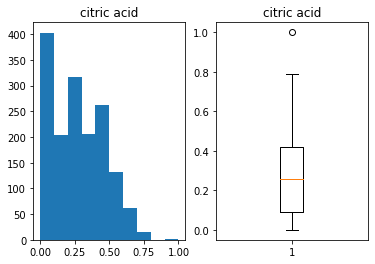

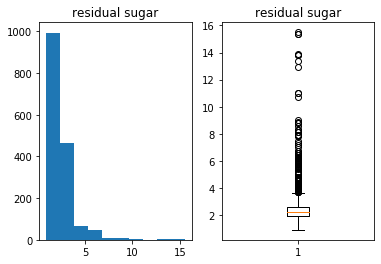

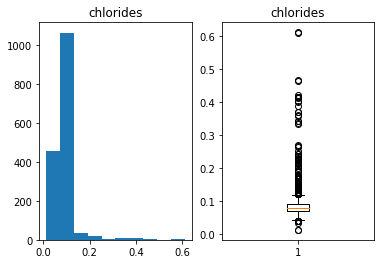

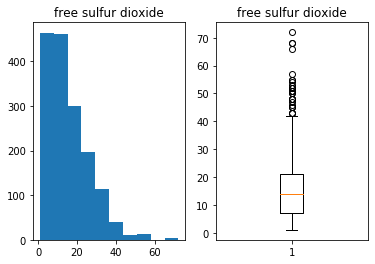

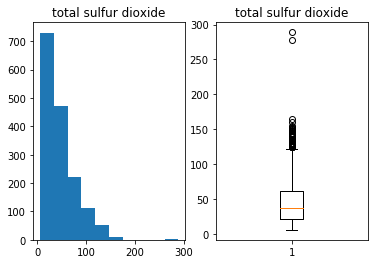

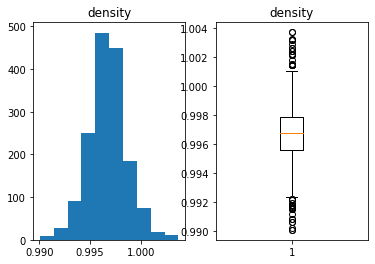

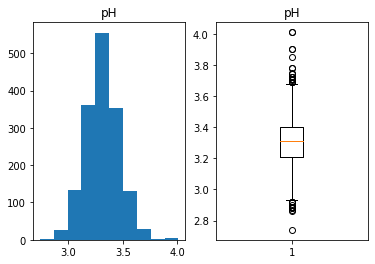

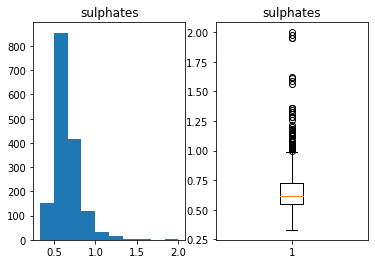

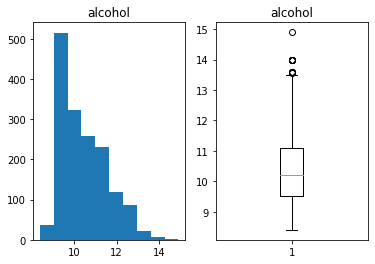

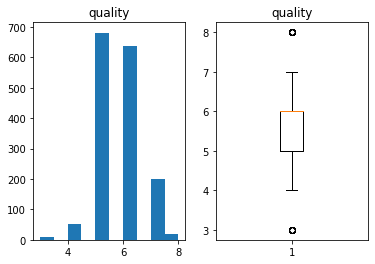

In [6]:
columns = list(df.columns)

for i in columns:
    plt.subplot(1,2,1)
    plt.hist(df[i])
    plt.title(i)
    
    plt.subplot(1,2,2)
    plt.boxplot(df[i])
    plt.title(i)
    
    plt.show()

In [7]:
df_winz = df
df_winz['fixed acidity'] = winsorize(df['fixed acidity'], (0,.03))
df_winz['volatile acidity'] = winsorize(df['volatile acidity'], (0,.01))
df_winz['citric acid'] = winsorize(df['citric acid'], (0,.01))
df_winz['residual sugar'] = winsorize(df['residual sugar'], (0,.09))
df_winz['chlorides'] = winsorize(df['chlorides'], (.01,.06))
df_winz['free sulfur dioxide'] = winsorize(df['free sulfur dioxide'], (0,.02))
df_winz['total sulfur dioxide'] = winsorize(df['total sulfur dioxide'], (0,.03))
df_winz['density'] = winsorize(df['density'], (.02,.02))
df_winz['pH'] = winsorize(df['pH'], (.02,.02))
df_winz['sulphates'] = winsorize(df['sulphates'], (0,.04))
df_winz['alcohol'] = winsorize(df['alcohol'], (0,.01))

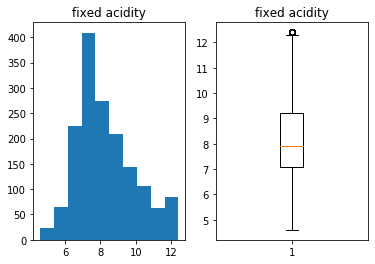

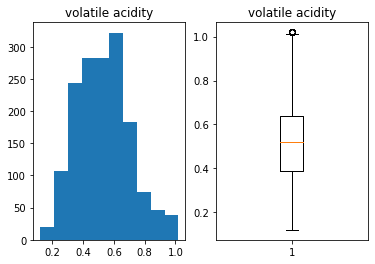

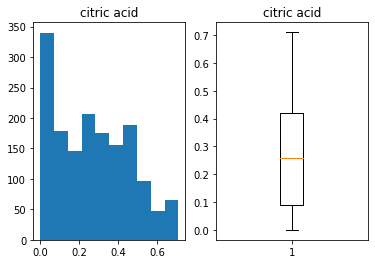

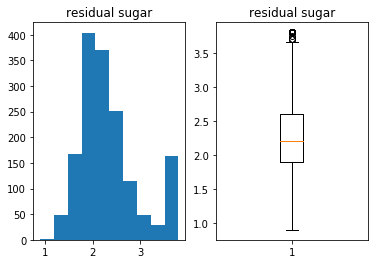

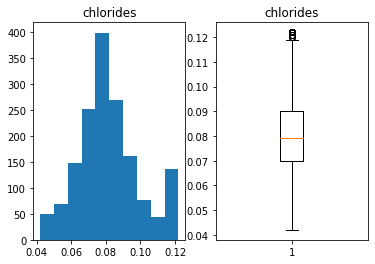

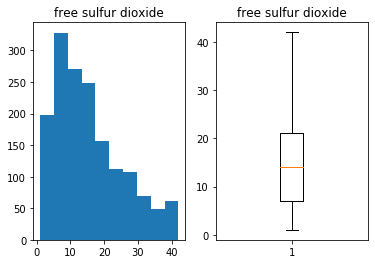

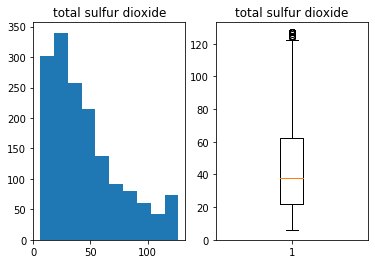

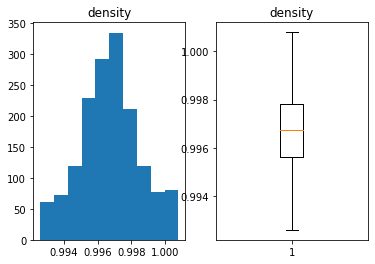

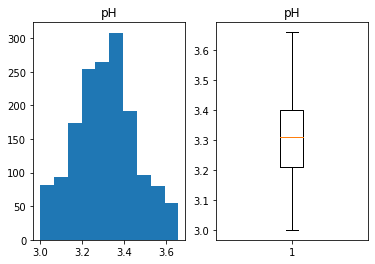

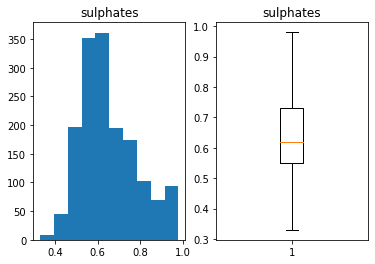

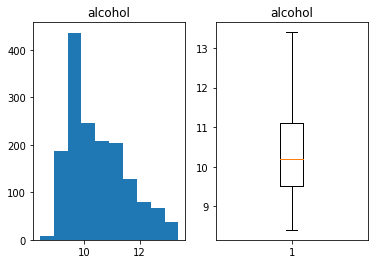

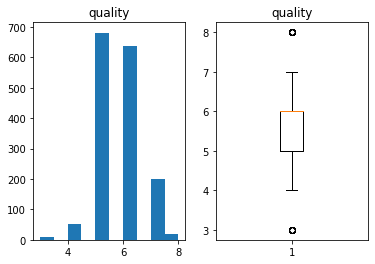

In [8]:
for i in columns:
    plt.subplot(1,2,1)
    plt.hist(df_winz[i])
    plt.title(i)
    
    plt.subplot(1,2,2)
    plt.boxplot(df_winz[i])
    plt.title(i)
    
    plt.show()

In [9]:
winz_qual_corr = abs(df_winz.corr()['quality']).sort_values(ascending=False)

In [10]:
for i in qual_corr.index:
    print(str(i)+' change')
    print(winz_qual_corr[i]-qual_corr[i])
    #print(qual_corr[i])
    #print(winz_qual_corr[i])
    print('-----')
    

quality change
0.0
-----
alcohol change
0.00257182172604431
-----
volatile acidity change
-0.0028313776386850176
-----
sulphates change
0.08214387754486446
-----
citric acid change
0.002292092094856507
-----
total sulfur dioxide change
0.01661268702118901
-----
density change
0.0013070398075384349
-----
chlorides change
0.053418331531189245
-----
fixed acidity change
0.0014043602773201047
-----
pH change
0.005377505715804268
-----
free sulfur dioxide change
-1.530832664746462e-05
-----
residual sugar change
0.008634825859127766
-----


# Decision Tree

In [11]:
features = list(df.columns)
features.remove('quality')
X = df_winz[features]
Y = df_winz['quality']

In [38]:
tree_start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', 
                                            max_features=None,
                                           max_depth=None)

tree_cvs = cross_val_score(decision_tree, X, Y, cv=5)
tree_cvs

array([0.45962733, 0.40498442, 0.45482866, 0.4245283 , 0.47949527])

In [39]:
print(time.time() - tree_start_time)

tree_cv_mean = tree_cvs.mean()
print('tree cross val mean: '+str(tree_cv_mean))

2.001319408416748
tree cross val mean: 0.444692796666058


# Random Forest

In [36]:
forest_start_time = time.time()

rfc = ensemble.RandomForestClassifier(criterion='entropy',
                                     max_features=None,
                                     max_depth=None)

forest_cvs = cross_val_score(rfc, X, Y, cv=5)
forest_cvs

c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default valu

array([0.48757764, 0.5482866 , 0.53894081, 0.53459119, 0.55205047])

In [40]:
print(time.time() - forest_start_time)

forest_cv_mean = forest_cvs.mean()
print('forest cross val mean: '+str(forest_cv_mean))

14.954134464263916
forest cross val mean: 0.5322893444472888
